In [23]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50, InceptionV3, MobileNetV2, Xception
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess, decode_predictions as resnet_decode
from tensorflow.keras.applications.inception_v3 import preprocess_input as inception_preprocess, decode_predictions as inception_decode
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess, decode_predictions as mobilenet_decode
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess, decode_predictions as xception_decode

# Шлях до папки з вашими зображеннями
image_folder = 'l4img/'  # Можете змінити шлях до ваших зображень

# Отримання всіх зображень з папки
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Функція для підготовки зображення
def prepare_image(img_path, target_size, preprocess_function):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return preprocess_function(img_array)

# Функція для відображення зображень та результатів
def display_predictions(image_path, predictions, model_name):
    img = image.load_img(image_path, target_size=(224, 224))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'{model_name} Predictions')
    plt.show()
    for pred in predictions:
        print(f"{pred[1]}: {pred[2]*100:.2f}%")
    print('-----------------------------------')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


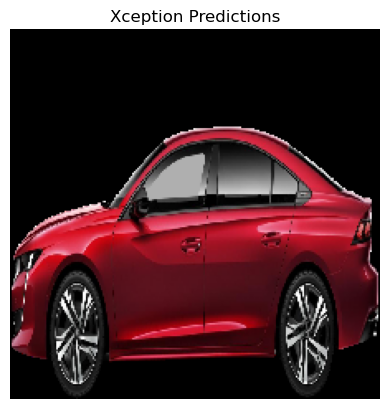

beach_wagon: 35.59%
car_wheel: 17.32%
sports_car: 14.58%
-----------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


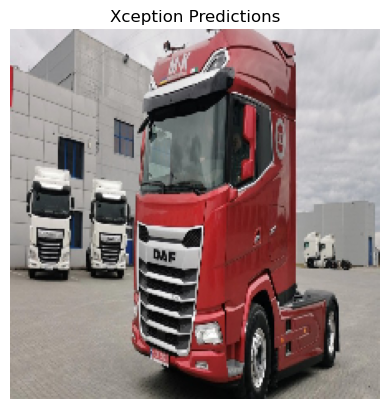

trailer_truck: 72.67%
recreational_vehicle: 8.49%
moving_van: 8.16%
-----------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


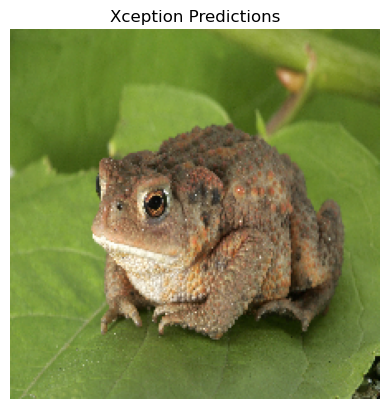

tailed_frog: 84.75%
tree_frog: 1.85%
bullfrog: 0.83%
-----------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


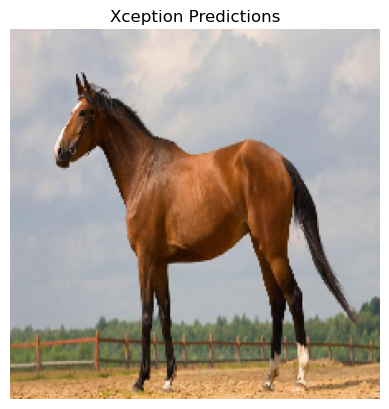

sorrel: 73.49%
hartebeest: 5.00%
worm_fence: 0.34%
-----------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


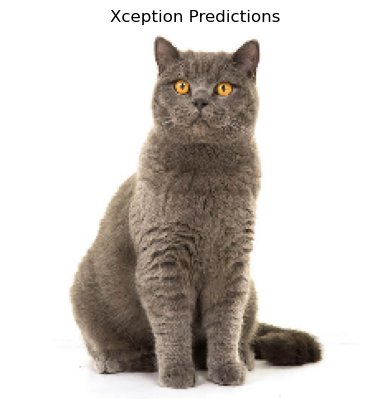

tabby: 29.38%
Egyptian_cat: 14.79%
tiger_cat: 10.40%
-----------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


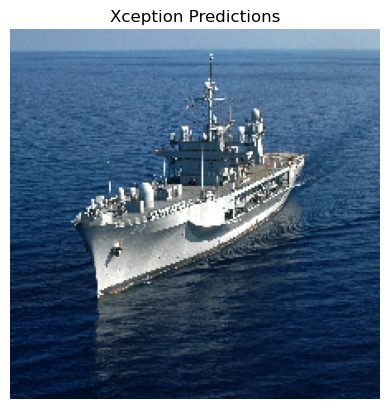

aircraft_carrier: 89.13%
submarine: 0.43%
container_ship: 0.23%
-----------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


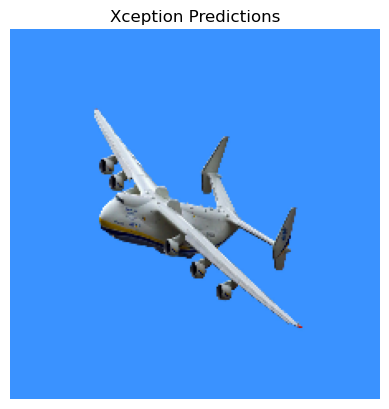

warplane: 66.74%
airliner: 15.64%
wing: 10.16%
-----------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


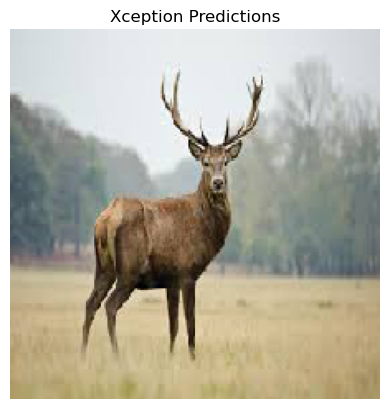

hartebeest: 76.43%
impala: 2.69%
gazelle: 1.50%
-----------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


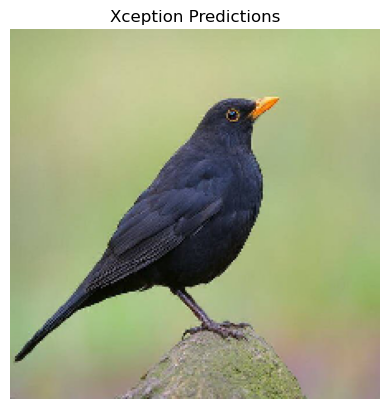

water_ouzel: 28.44%
robin: 8.77%
magpie: 7.40%
-----------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


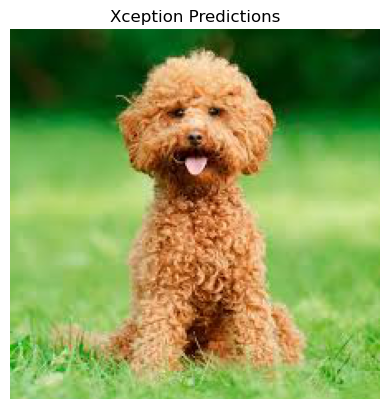

miniature_poodle: 57.06%
toy_poodle: 16.56%
standard_poodle: 2.55%
-----------------------------------


In [25]:
# Завантаження моделі Xception
model_xception = Xception(weights='imagenet')

# Розпізнаємо зображення за допомогою Xception
for img_name in image_files:
    img_path = os.path.join(image_folder, img_name)
    prepared_img = prepare_image(img_path, target_size=(299, 299), preprocess_function=xception_preprocess)
    
    # Передбачення
    predictions = model_xception.predict(prepared_img)
    
    # Декодуємо передбачення
    decoded_predictions = xception_decode(predictions, top=3)[0]
    
    # Відображаємо зображення та результат
    display_predictions(img_path, decoded_predictions, "Xception")
